In [59]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [60]:
# Create A Path to the CSV file
crime_rates = Path("./crime_250_plus.csv")
cities_population = Path("./population.csv")

# Read School and Student Data File and store into Pandas DataFrames
cities_crime_rates_df = pd.read_csv(crime_rates)
population_city_df = pd.read_csv(cities_population)

# Combine both CSV files into dataset
crime_rates_plus_population_df = pd.merge(cities_crime_rates_df, population_city_df, left_on= "cities", right_on= "US City", how= "right")
crime_rates_plus_population_df.head()


,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,"1,253.15",66.56,"1,448.59",NaN,1,New York,New York,8097282,8740292,-1.95%
1,California,Los Angeles,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,"1,640.99",478.97,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.65%
2,Illinois,Chicago,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,"2,358.83",427.84,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.99%
3,California,San Diego,"1,386,932",2220.67,2.46,39.25,99.01,225.89,366.61,268.03,"1,214.37",360.57,"1,842.97",11.09,8,San Diego,California,1388996,1386292,0.05%
4,Texas,Austin,"971,949",3612.23,2.57,85.81,101.55,224.91,414.84,450.64,"2,525.03",213.90,"3,189.57",7.82,12,Austin,Texas,984567,965827,0.48%


In [61]:
# filter cities to the 10 chosen for the project
filtered_cities_crime= cities_crime_rates_df[cities_crime_rates_df['cities'].isin(['Atlanta', 'Austin', 'Chicago', 'Denver', 'Los Angeles', 'Nashville', 'New York', 'San Diego', 'Tampa', 'Boston'])]
filtered_cities_crime

# Now set an index for your cities
filtered_cities_crime = filtered_cities_crime.set_index("cities")
filtered_cities_crime

,states,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson
cities,,,,,,,,,,,,,
Los Angeles,California,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,"1,640.99",478.97,"2,535.92",35.29
San Diego,California,"1,386,932",2220.67,2.46,39.25,99.01,225.89,366.61,268.03,"1,214.37",360.57,"1,842.97",11.09
Denver,Colorado,"706,616",4360.93,8.35,98.92,174.35,393.99,675.61,612.92,"2,267.29",786.85,"3,667.06",18.26
Tampa,Florida,"384,360",2218.24,10.15,31.48,105.63,317.15,464.41,321.31,"1,274.85",147.52,"1,743.68",10.15
Atlanta,Georgia,"481,343",5727.52,16.41,58.59,293.55,567.16,935.72,704.28,"3,387.19",684.96,"4,776.43",15.37
Chicago,Illinois,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,"2,358.83",427.84,"3,263.80",18.99
Boston,Massachusetts,"682,903",2758.22,8.35,42.47,205.59,412.80,669.20,308.83,"1,603.74",176.45,"2,089.02",NaN
New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,"1,253.15",66.56,"1,448.59",NaN
Nashville,Tennessee,"674,942",4966.50,16.30,72.90,303.14,745.84,"1,138.17",631.31,"2,806.61",380.03,"3,817.96",10.37


In [62]:
# New Data Frame with only certain columns (states, cities, total_crime)
updated_cities_crime_rates = filtered_cities_crime[["states", "total_crime"]]
updated_cities_crime_rates

,states,total_crime
cities,,
Los Angeles,California,3332.52
San Diego,California,2220.67
Denver,Colorado,4360.93
Tampa,Florida,2218.24
Atlanta,Georgia,5727.52
Chicago,Illinois,4381.65
Boston,Massachusetts,2758.22
New York,New York,1987.49
Nashville,Tennessee,4966.50


In [63]:
total_crime_df= updated_cities_crime_rates["total_crime"]
total_crime_df

cities
Los Angeles    3332.52
San Diego      2220.67
Denver         4360.93
Tampa          2218.24
Atlanta        5727.52
Chicago        4381.65
Boston         2758.22
New York       1987.49
Nashville      4966.50
Austin         3612.23
Name: total_crime, dtype: float64

In [64]:
updated_cities_crime_rates['total crime score'] = updated_cities_crime_rates['total_crime'].rank()
updated_cities_crime_rates

,states,total_crime,total crime score
cities,,,
Los Angeles,California,3332.52,5.0
San Diego,California,2220.67,3.0
Denver,Colorado,4360.93,7.0
Tampa,Florida,2218.24,2.0
Atlanta,Georgia,5727.52,10.0
Chicago,Illinois,4381.65,8.0
Boston,Massachusetts,2758.22,4.0
New York,New York,1987.49,1.0
Nashville,Tennessee,4966.50,9.0


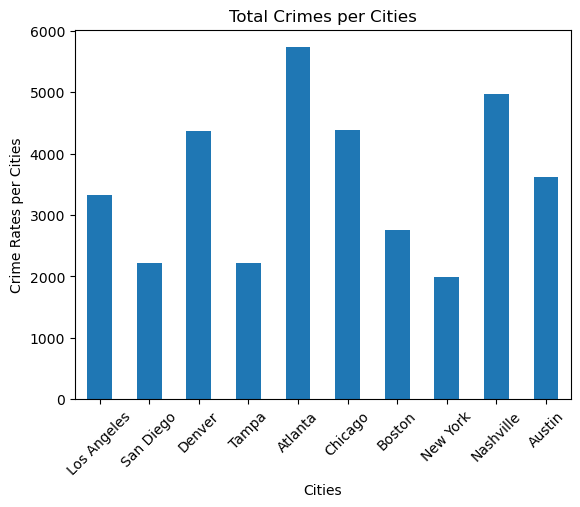

In [65]:
# Create a bar graph for the assigned cities crime
cities_crime_rates_graph= total_crime_df.plot(kind="bar")
cities_crime_rates_graph.set_xlabel("Cities")
cities_crime_rates_graph.set_ylabel("Crime Rates per Cities")
cities_crime_rates_graph.set_title("Total Crimes per Cities")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Create a scatter plot for Total Crimes per Cities
plt.scatter(